# Techniques for the Assignment 1/2

JD Sports is used as an exmaple in this session.

## Download the required data

You need to download the daily prices from 02/03/2020 to 28/02/2022, in total 505 days. Then set the first 485 days as the training set and the last 20 days as the test set.

In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# import required packages
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib as mp
import statsmodels as ss

In [4]:
# Download JD Sports prices
JD=yf.download('JD.L',start='2020-03-02',end='2022-03-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
print(JD)

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2020-03-02  150.080002  150.880005  142.279999  144.240005  144.237717   
2020-03-03  147.399994  150.720001  146.039993  147.800003  147.797653   
2020-03-04  150.000000  150.000000  143.720001  144.759995  144.757690   
2020-03-05  145.399994  147.320007  140.240005  141.199997  141.197754   
2020-03-06  138.800003  139.235199  133.320007  135.720001  135.717834   
...                ...         ...         ...         ...         ...   
2022-02-22  157.699997  163.600006  156.910004  160.600006  160.600006   
2022-02-23  162.699997  162.699997  155.850006  155.850006  155.850006   
2022-02-24  148.550003  155.000000  145.992004  153.500000  153.500000   
2022-02-25  157.250000  158.800003  148.710007  150.250000  150.250000   
2022-02-28  148.199997  151.000000  145.750000  151.000000  151.000000   

              Volume  
Date          

## Indexing

### Select a column, row, or cell

#### By the names of columns and rows

In [6]:
# select a column
JD['Adj Close']

Date
2020-03-02    144.237717
2020-03-03    147.797653
2020-03-04    144.757690
2020-03-05    141.197754
2020-03-06    135.717834
                 ...    
2022-02-22    160.600006
2022-02-23    155.850006
2022-02-24    153.500000
2022-02-25    150.250000
2022-02-28    151.000000
Name: Adj Close, Length: 505, dtype: float64

In [7]:
# select a row
JD.loc['2020-03-02']

Open         1.500800e+02
High         1.508800e+02
Low          1.422800e+02
Close        1.442400e+02
Adj Close    1.442377e+02
Volume       1.419212e+07
Name: 2020-03-02 00:00:00, dtype: float64

In [8]:
# select a cell
JD['Adj Close']['2020-03-02']

144.2377166748047

#### By the numbers of columns and rows

In [9]:
# select a column
JD.iloc[:,4]

Date
2020-03-02    144.237717
2020-03-03    147.797653
2020-03-04    144.757690
2020-03-05    141.197754
2020-03-06    135.717834
                 ...    
2022-02-22    160.600006
2022-02-23    155.850006
2022-02-24    153.500000
2022-02-25    150.250000
2022-02-28    151.000000
Name: Adj Close, Length: 505, dtype: float64

In [10]:
# select a row
JD.iloc[0]

Open         1.500800e+02
High         1.508800e+02
Low          1.422800e+02
Close        1.442400e+02
Adj Close    1.442377e+02
Volume       1.419212e+07
Name: 2020-03-02 00:00:00, dtype: float64

In [11]:
# select a cell
JD.iloc[0,4]

144.2377166748047

### Define the training and test sets

In [12]:
# Training set
JDtraining=JD.iloc[0:484]

In [13]:
# Drop the columns we don't need
JDtraining=JDtraining.drop(columns=['Open','High','Low','Close','Volume'])

In [14]:
print(JDtraining)

             Adj Close
Date                  
2020-03-02  144.237717
2020-03-03  147.797653
2020-03-04  144.757690
2020-03-05  141.197754
2020-03-06  135.717834
...                ...
2022-01-24  182.899994
2022-01-25  182.550003
2022-01-26  184.000000
2022-01-27  187.000000
2022-01-28  188.300003

[484 rows x 1 columns]


In [15]:
# Test set
JDtest=JD.iloc[485:505]

# or JDtest=JD.iloc[-20:-1].append(JD.iloc[-1])

In [16]:
# Drop the columns we don't need
JDtest=JDtest.drop(columns=['Open','High','Low','Close','Volume'])

In [17]:
print(JDtest)

             Adj Close
Date                  
2022-02-01  191.399994
2022-02-02  188.300003
2022-02-03  184.300003
2022-02-04  182.000000
2022-02-07  181.399994
2022-02-08  179.050003
2022-02-09  181.899994
2022-02-10  178.850006
2022-02-11  174.649994
2022-02-14  168.500000
2022-02-15  168.850006
2022-02-16  166.000000
2022-02-17  165.000000
2022-02-18  165.699997
2022-02-21  161.550003
2022-02-22  160.600006
2022-02-23  155.850006
2022-02-24  153.500000
2022-02-25  150.250000
2022-02-28  151.000000


## Descriptive Analytics

### Calculate daily returns

The formula is: today's return = (today's price - yesterday's price)/yesterday's price

In [18]:
returns=(JDtraining['Adj Close']-JDtraining.shift(1)['Adj Close'])/JDtraining.shift(1)['Adj Close']

# JDtraining.shift(1) can shift all records down by one row.

In [19]:
JDtraining['Return']=returns

In [20]:
JDtraining

,Adj Close,Return
Date,,
2020-03-02,144.237717,NaN
2020-03-03,147.797653,0.024681
2020-03-04,144.757690,-0.020568
2020-03-05,141.197754,-0.024592
2020-03-06,135.717834,-0.038810
...,...,...
2022-01-24,182.899994,-0.050856
2022-01-25,182.550003,-0.001914
2022-01-26,184.000000,0.007943


In [21]:
# calculate daily returns of test set
JDtest['Return']=(JDtest['Adj Close']-JDtest.shift(1)['Adj Close'])/JDtest.shift(1)['Adj Close']

In [22]:
JDtest

,Adj Close,Return
Date,,
2022-02-01,191.399994,NaN
2022-02-02,188.300003,-0.016196
2022-02-03,184.300003,-0.021243
2022-02-04,182.000000,-0.012480
2022-02-07,181.399994,-0.003297
2022-02-08,179.050003,-0.012955
2022-02-09,181.899994,0.015917
2022-02-10,178.850006,-0.016767
2022-02-11,174.649994,-0.023483


In [23]:
JDtest.iloc[0,1]=(JDtest.iloc[0,0]-JDtraining.iloc[-1,0])/JDtraining.iloc[-1,0]

In [24]:
JDtest

,Adj Close,Return
Date,,
2022-02-01,191.399994,0.016463
2022-02-02,188.300003,-0.016196
2022-02-03,184.300003,-0.021243
2022-02-04,182.000000,-0.012480
2022-02-07,181.399994,-0.003297
2022-02-08,179.050003,-0.012955
2022-02-09,181.899994,0.015917
2022-02-10,178.850006,-0.016767
2022-02-11,174.649994,-0.023483


### Descriptive statistics

In [25]:
JDtraining.mean()

Adj Close    166.527767
Return         0.001114
dtype: float64

In [26]:
JDtraining.median()

Adj Close    166.797348
Return        -0.000459
dtype: float64

In [27]:
#Sample variance
JDtraining.var()

Adj Close    1329.607497
Return          0.001135
dtype: float64

In [28]:
#Population variance, not required for your assignment
JDtraining.var(ddof=0)

Adj Close    1326.860374
Return          0.001133
dtype: float64

In [29]:
# Sample standard deviation
JDtraining.std()

Adj Close    36.463783
Return        0.033697
dtype: float64

In [30]:
# Population standard deviation, not required
JDtraining.std(ddof=0)

Adj Close    36.426095
Return        0.033662
dtype: float64

In [31]:
# Return to risk = mean of returns/std of returns
JDtraining['Return'].mean()/JDtraining['Return'].std()

0.03307316631317267

In [32]:
JDtraining.describe()

,Adj Close,Return
count,484.000000,483.000000
mean,166.527767,0.001114
std,36.463783,0.033697
min,58.639065,-0.186110
25%,141.527740,-0.013009
50%,166.797348,-0.000459
75%,189.766975,0.014323
max,234.000000,0.201574


### Histogram, Boxplot and Line charts

array([[<AxesSubplot:title={'center':'Adj Close'}>,
        <AxesSubplot:title={'center':'Return'}>]], dtype=object)

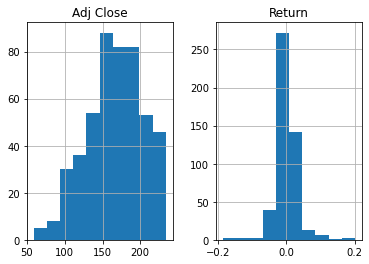

In [33]:
JDtraining.hist()

array([[<AxesSubplot:title={'center':'Return'}>]], dtype=object)

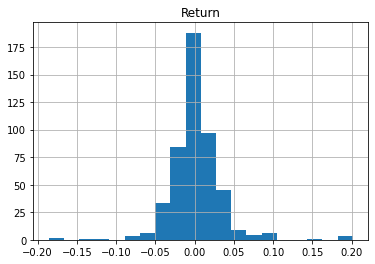

In [34]:
JDtraining.hist(column='Return',bins=20)

(array([  2.,   0.,   1.,   1.,   0.,   3.,   6.,  33.,  84., 188.,  97.,
         45.,   9.,   4.,   6.,   0.,   0.,   1.,   0.,   3.]),
 array([-0.18610996, -0.16672578, -0.1473416 , -0.12795742, -0.10857325,
        -0.08918907, -0.06980489, -0.05042071, -0.03103653, -0.01165235,
         0.00773183,  0.02711601,  0.04650019,  0.06588437,  0.08526855,
         0.10465273,  0.12403691,  0.14342109,  0.16280527,  0.18218945,
         0.20157363]),
 <BarContainer object of 20 artists>)

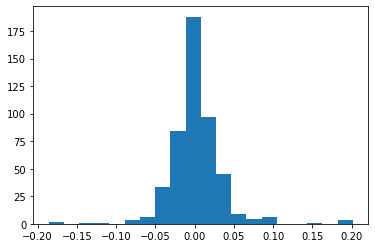

In [35]:
mp.pyplot.hist(JDtraining['Return'],bins=20)

Text(-0.0005509978077926453, 14, 'Median: -0.0005')

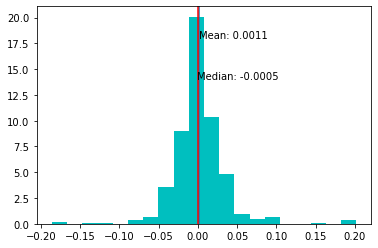

In [36]:
htg=mp.pyplot.hist(JDtraining['Return'],bins=20,density=True,cumulative=False,histtype='bar',color='c')
mp.pyplot.axvline(JDtraining['Return'].mean())
mp.pyplot.text(JDtraining['Return'].mean()*1.1,18,'Mean: {:,.4f}'.format(JDtraining['Return'].mean()))
mp.pyplot.axvline(JDtraining['Return'].median(),color='r')
mp.pyplot.text(JDtraining['Return'].median()*1.2,14,'Median: {:,.4f}'.format(JDtraining['Return'].median()))

Text(166.79734802246094, 40, 'Median: 166.7973')

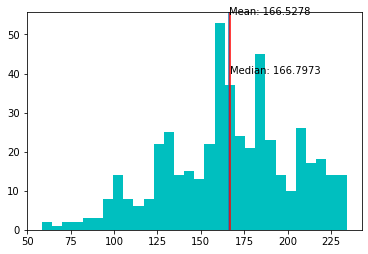

In [37]:
htg=mp.pyplot.hist(JDtraining['Adj Close'],bins=30,density=False,cumulative=False,histtype='bar',color='c')
mp.pyplot.axvline(JDtraining['Adj Close'].mean())
mp.pyplot.text(JDtraining['Adj Close'].mean(),55,'Mean: {:,.4f}'.format(JDtraining['Adj Close'].mean()))
mp.pyplot.axvline(JDtraining['Adj Close'].median(),color='r')
mp.pyplot.text(JDtraining['Adj Close'].median(),40,'Median: {:,.4f}'.format(JDtraining['Adj Close'].median()))

<AxesSubplot:>

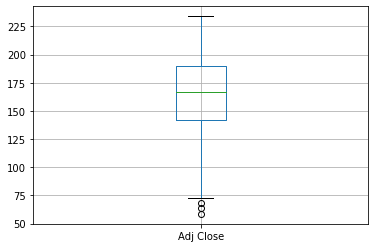

In [38]:
JDtraining.boxplot(column='Adj Close')

Text(0, 0.5, 'JD price')

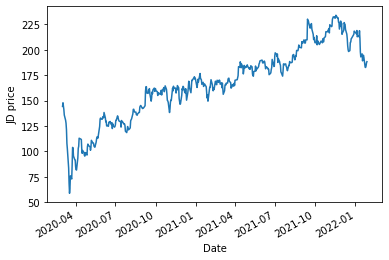

In [39]:
priceline=JDtraining.plot.line(y='Adj Close',legend=False)
priceline.set_xlabel("Date")
priceline.set_ylabel("JD price")

## Time Series

### Moving Average

In [40]:
ma5=JDtraining.rolling(5).mean()

In [41]:
ma20=JDtraining.rolling(20).mean()

In [42]:
priceMAdata=pd.DataFrame({'Price':JDtraining['Adj Close'],'MA5':ma5['Adj Close'],'MA20':ma20['Adj Close']})

<AxesSubplot:xlabel='Date'>

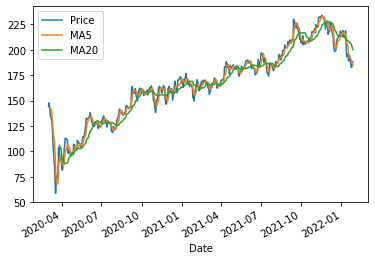

In [43]:
priceMAdata.plot.line()
#mp.pyplot.show()

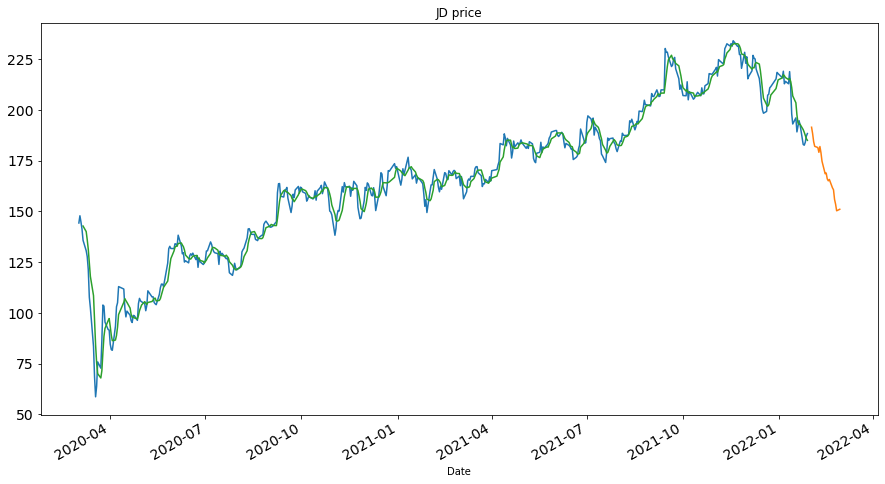

In [44]:
JDtraining['Adj Close'].plot(figsize=(15,8), title= 'JD price', fontsize=14)
JDtest['Adj Close'].plot(figsize=(15,8), title= 'JD price', fontsize=14)
priceMAdata['MA5'].plot(figsize=(15,8), title= 'JD price', fontsize=14)
mp.pyplot.show()